# 12.1 저 PER 전략

2021년 04월 01일 데이터가 저장된 엑셀 파일을 불러옵니다. 

In [1]:
import pandas as pd

df_factor = pd.read_excel(
    "data/data_kosdaq_20210401_per.xlsx", 
    index_col=0, 
    usecols=[0, 1, 6, 8]   # 종목코드, 종목명, PER, PBR
)
df_factor.head()

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종목명,PER,PBR
종목코드,,,
060310,3S,-,3.38
054620,APS홀딩스,-,0.93
265520,AP시스템,42.92,3.86
211270,AP위성,300.98,2.8
035760,CJ ENM,26.55,1.05


In [2]:
df_factor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, 060310 to 238490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     1475 non-null   object
 1   PER     1475 non-null   object
 2   PBR     1475 non-null   object
dtypes: object(3)
memory usage: 46.1+ KB


In [3]:
import numpy as np

df_factor.replace('-', np.nan, inplace=True)
df_factor.head()

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_58284\2071828942.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_factor.replace('-', np.nan, inplace=True)


,종목명,PER,PBR
종목코드,,,
060310,3S,NaN,3.38
054620,APS홀딩스,NaN,0.93
265520,AP시스템,42.92,3.86
211270,AP위성,300.98,2.80
035760,CJ ENM,26.55,1.05


In [4]:
df_factor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, 060310 to 238490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     1475 non-null   object 
 1   PER     857 non-null    float64
 2   PBR     1389 non-null   float64
dtypes: float64(2), object(1)
memory usage: 46.1+ KB


In [5]:
import pandas as pd

df = pd.read_excel("data/data_kosdaq_20210401_sise.xlsx", index_col=0)
df_volume = df[['거래량']]
#df_volume.shape
df_volume.head()

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,거래량
종목코드,
060310,287995
054620,369245
265520,118094
211270,313536
035760,76549


In [6]:
df2 = df_factor.join(df_volume)
df2.head()

,종목명,PER,PBR,거래량
종목코드,,,,
060310,3S,NaN,3.38,287995
054620,APS홀딩스,NaN,0.93,369245
265520,AP시스템,42.92,3.86,118094
211270,AP위성,300.98,2.80,313536
035760,CJ ENM,26.55,1.05,76549


In [7]:
df2.shape

(1475, 4)

In [8]:
import pandas as pd

df_change = pd.read_excel("data/data_kosdaq_change_2021.xlsx", index_col=0, usecols=[0, 5])
df_change.head()

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,등락률
종목코드,
060310,36.98
054620,100.51
265520,0.35
211270,2.93
013720,20.31


In [9]:
df_change.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1478 entries, 060310 to 238490
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등락률     1478 non-null   float64
dtypes: float64(1)
memory usage: 23.1+ KB


In [10]:
df3 = df2.join(df_change)
df3.head()

,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
060310,3S,NaN,3.38,287995,36.98
054620,APS홀딩스,NaN,0.93,369245,100.51
265520,AP시스템,42.92,3.86,118094,0.35
211270,AP위성,300.98,2.80,313536,2.93
035760,CJ ENM,26.55,1.05,76549,8.58


In [11]:
df3.shape

(1475, 5)

2021년 4월 1일에 거래량이 0인 종목은 거래정지된 종목입니다. 따라서 먼저 거래량을 기준으로 필터링합니다. 

In [12]:
cond = df3['거래량'] !=0
df4 = df3[cond].copy()
df4.shape

(1385, 5)

PER 값을 기준으로 오른차순 정렬합니다. 

In [13]:
df5 = df4.sort_values(by="PER", ascending=True)
df5.reset_index(inplace=True)
df5

,종목코드,종목명,PER,PBR,거래량,등락률
0,030960,양지사,1.34,0.99,50285,7.23
1,032940,원익,2.11,0.86,79905,-8.56
2,007720,대명소노시즌,2.28,0.88,728675,-9.34
3,151860,KG ETS,2.28,0.94,701304,181.89
4,005670,푸드웰,2.39,0.98,104191,15.89
...,...,...,...,...,...,...
1380,064240,홈캐스트,NaN,1.53,112157,6.79
1381,050090,휘닉스소재,NaN,3.48,9550009,-20.73
1382,090710,휴림로봇,NaN,3.05,2215108,-7.87
1383,205470,휴마시스,NaN,13.25,2360495,121.76


In [14]:
low_per30 = df5.iloc[:30]
low_per30['등락률'].mean()

14.45

In [15]:
import pandas as pd

df5['group'] = pd.cut(df5.index, bins=20, labels=False)
df5.head()

,종목코드,종목명,PER,PBR,거래량,등락률,group
0,030960,양지사,1.34,0.99,50285,7.23,0
1,032940,원익,2.11,0.86,79905,-8.56,0
2,007720,대명소노시즌,2.28,0.88,728675,-9.34,0
3,151860,KG ETS,2.28,0.94,701304,181.89,0
4,005670,푸드웰,2.39,0.98,104191,15.89,0


In [16]:
df6 = df5.groupby(by='group')[['등락률']].mean()

In [17]:
df6

,등락률
group,
0,12.979143
1,11.553971
2,15.552647
3,17.360145
4,10.876143
5,7.814783
6,8.540000
7,7.813623
8,5.913768


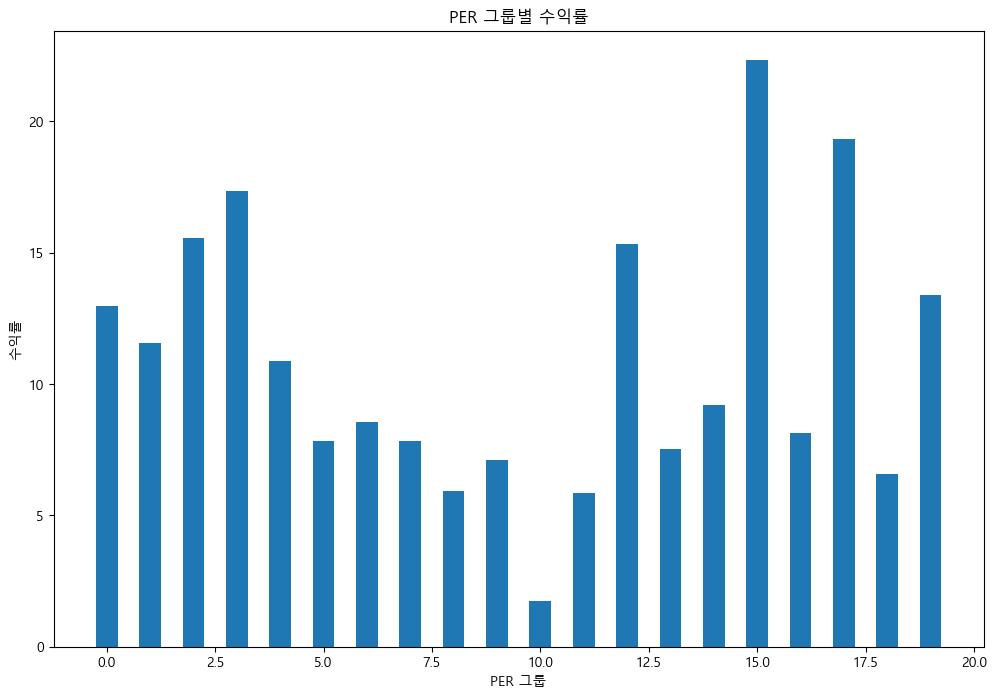

In [18]:
import matplotlib.pyplot as plt 
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

ax.bar(df6.index, df6["등락률"], width=0.5)
plt.title("PER 그룹별 수익률")
plt.xlabel("PER 그룹")
plt.ylabel("수익률")
plt.show()

# 12.2 PBR + PER 콤보전략

In [19]:
df4

,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
060310,3S,NaN,3.38,287995,36.98
054620,APS홀딩스,NaN,0.93,369245,100.51
265520,AP시스템,42.92,3.86,118094,0.35
211270,AP위성,300.98,2.80,313536,2.93
035760,CJ ENM,26.55,1.05,76549,8.58
...,...,...,...,...,...
024060,흥구석유,12.65,1.40,208970,2.91
010240,흥국,16.76,1.74,611494,-1.26
189980,흥국에프엔비,34.70,3.00,15014840,-32.25


In [20]:
cond = (df4['PER'] >= 2.5) & (df4['PER'] <= 10)
df5 = df4[cond].copy()
df5

,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
023460,CNH,6.58,0.99,138189,35.30
028150,GS홈쇼핑,8.28,0.87,7971,NaN
021320,KCC건설,6.96,0.52,51828,26.36
036670,KCI,8.99,1.65,17555,-3.35
024940,PN풍년,9.10,1.37,528639,29.52
...,...,...,...,...,...
054040,한국컴퓨터,9.46,0.80,4380527,-3.62
054920,한컴위드,4.72,2.04,673200,4.12
039010,현대통신,9.09,1.19,103289,-16.09


In [21]:
df6 = df5.sort_values(by='PBR')[:30]
df6.describe()

,PER,PBR,거래량,등락률
count,30.000000,30.000000,3.000000e+01,30.000000
mean,6.250000,0.558667,4.345707e+06,13.265667
std,1.925885,0.130377,1.984129e+07,26.490045
min,2.890000,0.280000,7.130000e+03,-38.190000
25%,5.082500,0.485000,3.468775e+04,-2.790000
50%,6.100000,0.580000,7.865950e+04,11.555000
75%,7.977500,0.670000,2.856495e+05,26.232500
max,9.100000,0.730000,1.083873e+08,99.220000


In [22]:
df6[df6['등락률'] == df6['등락률'].min()]

,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
192410,감마누,6.85,0.28,2462176,-38.19


# 12.3	시가총액별 콤보 전략

In [23]:
import pykrx
pykrx.__version__

'1.0.48'

In [24]:
from pykrx import stock as krx

krx_caps = krx.get_market_cap_by_ticker("20070501")
print(krx_caps)

KeyError: "None of [Index(['종가', '시가총액', '거래량', '거래대금'], dtype='object')] are in the [columns]"

In [80]:
from pykrx import stock
import pandas as pd 

df1 = stock.get_market_cap_by_ticker("20100104", "20191")
df1 = df1[["종가", "시가총액"]]
df1.columns = ["시가", "시가총액"]
df1 = df1.sort_values('시가총액')
df1['group'] = pd.cut(df1.reset_index().index, bins=3, labels=['소형주', '중형주', '대형주'])
df1.tail()

KeyError: "None of [Index(['종가', '시가총액', '거래량', '거래대금'], dtype='object')] are in the [columns]"

In [25]:
df2 = stock.get_market_fundamental_by_ticker("20100104")
df2 = df2[['PER', 'PBR']]
df2.head()

NameError: name 'stock' is not defined

In [ ]:
df3 = stock.get_market_ohlcv_by_ticker("20101231", prev=True)
df3 = df3[['종가']]
df3.head()

In [ ]:
t0 = pd.merge(left=df1, right=df2, left_index=True, right_index=True)
df = pd.merge(left=t0, right=df3, left_index=True, right_index=True)
df.head()

In [ ]:
df = df.query('PBR != 0')
df['수익률'] = df['종가'] / df['시가']
cond = (df['PER'] >= 2.5) & (df['PER'] <= 10)
top30 = df[cond].sort_values('PBR').groupby('group').head(30)
top30.head()

In [ ]:
import numpy as np

how = {
    '수익률' : np.mean
}
yoy = top30.groupby('group').agg(how)
yoy.columns = ['2010']
yoy

In [ ]:
def low_per_pbr(year):
    df1 = stock.get_market_cap_by_ticker(f"{year}0101")
    df1 = df1[["종가", "시가총액"]]
    df1.columns = ["시가", "시가총액"]
    df1 = df1.sort_values('시가총액')
    df1['group'] = pd.cut(df1.reset_index().index, bins=3, labels=['소형주', '중형주', '대형주'])
    
    df2 = stock.get_market_fundamental_by_ticker(f"{year}0101")
    df2 = df2[['PER', 'PBR']]
    
    df3 = stock.get_market_ohlcv_by_ticker(f"{year}1231", prev=True)
    df3 = df3[['종가']]
    
    t0 = pd.merge(left=df1, right=df2, left_index=True, right_index=True)
    df = pd.merge(left=t0, right=df3, left_index=True, right_index=True)
    
    df = df.query('PBR != 0').copy()
    df['수익률'] = df['종가'] / df['시가']
    cond = (df['PER'] >= 2.5) & (df['PER'] <= 10)
    top30 = df[cond].sort_values('PBR').groupby('group').head(30)
    
    how = {
        '수익률' : np.mean
    }
    yoy = top30.groupby('group').agg(how)
    yoy.columns = [year]
    return yoy

In [ ]:
import time 

dfs = [ ]
for date in range(2010, 2021):
    df = low_per_pbr(f"{date}")
    dfs.append(df)
    time.sleep(1)
    
df = pd.concat(dfs, axis=1)
df

In [ ]:
df.cumprod(axis=1)

In [ ]:
df.cumprod(axis=1).transpose().plot.line()